<a href="https://colab.research.google.com/github/Atit-Bashyal/solar/blob/main/example_noteboook_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import math
import csv
from datetime import datetime
from datetime import timedelta
import time
import datetime 
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint


from time import time
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller,acf, pacf

from matplotlib.pylab import rcParams
from matplotlib.pyplot import figure

import xlrd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from itertools import product
import statsmodels.api as sm
from math import sqrt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import datetime
from keras.callbacks import EarlyStopping
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler




%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

In [ ]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 
        ax.xaxis.set_tick_params(labelsize=20)
        ax.yaxis.set_tick_params(labelsize=20)


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

def downsample_results(x, y_pred, y_true, resolution, model_name, savefig=False, xlim=False,ylim=False):
    """
    This function takes the hourly results and downsamples them to the given resolution.
    
    x, datetime values
    y_pred, y predictions
    y_true, y true values
    magnitude, scaling factor for y axis
    resolution, Pandas resample resolution e.g. 6H, D, W
    model_name, string containing model name, e.g. 'MVLR'
    savefig, wether to save the figure or not
    """

    # Make it a df to be able to downsample
    datetime = x.index
    print(datetime.shape)

    y_pred = y_pred.reshape(y_pred.shape[0])
    y_true = y_true.reshape(y_true.shape[0])

    results = pd.DataFrame(y_true, y_pred) # For some reason y_true becomes the index
    result = results.reset_index() # Ugly way to fix above problem
    result.columns = ['y_pred', 'y_true']

    result['datetime'] = datetime
    result = result.set_index(['datetime'])

    # Save the model results for later usage
    result.to_csv('models\\'+model_name+'_'+resolution+'_predictions.csv')

    result = result.resample(resolution).sum() # Resample data

    result = result.dropna()
    
    # Calculate evaluation metrics over the result

    ytrue = result['y_true']
    ypred = result['y_pred']
    n = len(result)

    # Recalculated the metrics for the downsampled results
    mse_result = (1/n)*np.sum((ypred - ytrue)**2)
    mape_result = (100/n) * np.sum(np.abs((ytrue - ypred) / ypred))
    smape_result = (100/n) * np.sum( np.abs((ytrue - ypred)) / (np.abs(ytrue) + np.abs(ypred)) )

    # Create plot
    plt.figure(figsize=(20,10))
    plt.plot(result.index, result['y_true'], '.-', color='red', label='Real values', alpha=0.5, ms=10) # ms is markersize
    plt.plot(result.index, result['y_pred'], '.-', color='blue', label='Predicted values', ms=10)

    plt.ylabel(r'Power' , fontsize=14)
    plt.xlabel('date-time', fontsize=14) #TODO: set x values as actual dates

    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

    plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

    plt.title(model_name+'predictions downsampled to '+resolution+' resolution. \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse_result, mape_result, smape_result), fontsize = 14)
    
    if savefig:
        plt.savefig('figures/MVLR_day.png', dpi=1300)

    if xlim:
      plt.xlim(plt.xlim([x.index[0], x.index[2880]]))

    if ylim:
      plt.ylim(0,10000)

In [ ]:
merkel_1 = pd.read_csv('/content/drive/MyDrive/Wind_turbines/Meckel_1.csv',parse_dates=[0],index_col=0)

In [ ]:

merkel_1.temperature = merkel_1.temperature.replace('     0.000     0.000', '0.00')
merkel_1['temperature'] = merkel_1['temperature'].astype(float)

In [ ]:
merkel_1

,power,wind_speed,wind_direction,temperature
datetime,,,,
2019-02-13 12:30:00,-0.003,0.8,233.0,0.101
2019-02-13 12:45:00,-0.003,0.8,358.0,0.101
2019-02-13 13:00:00,-0.003,0.9,319.0,0.664
2019-02-13 13:15:00,-0.003,0.8,290.0,0.664
2019-02-13 13:30:00,-0.003,0.8,270.0,0.664
...,...,...,...,...
2020-12-21 13:15:00,555.373,7.4,182.0,7.205
2020-12-21 13:30:00,787.080,8.0,183.0,7.205
2020-12-21 13:45:00,567.633,7.3,175.0,7.205


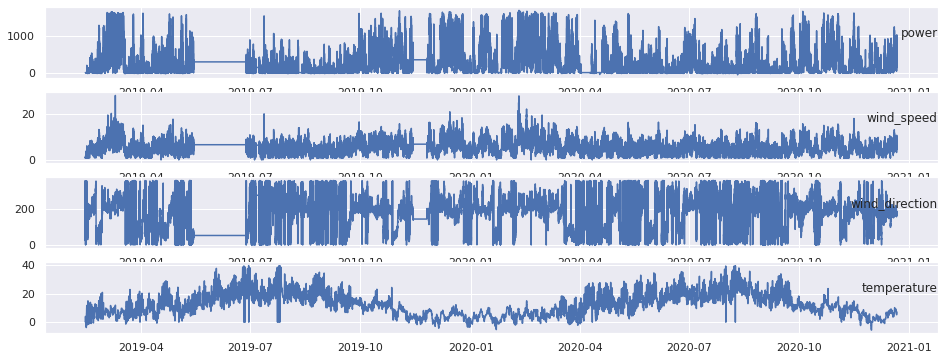

In [ ]:
values = merkel_1.values
# specify columns to plot
groups = [0,1,2,3]
i = 1
# plot each column
plt.figure(figsize=(16, 6))
for group in groups:
  plt.subplot(len(groups), 1, i)
  plt.plot(merkel_1.index,values[:, group])
  plt.title(merkel_1.columns[group], y=0.5, loc='right')
  i += 1
plt.show()

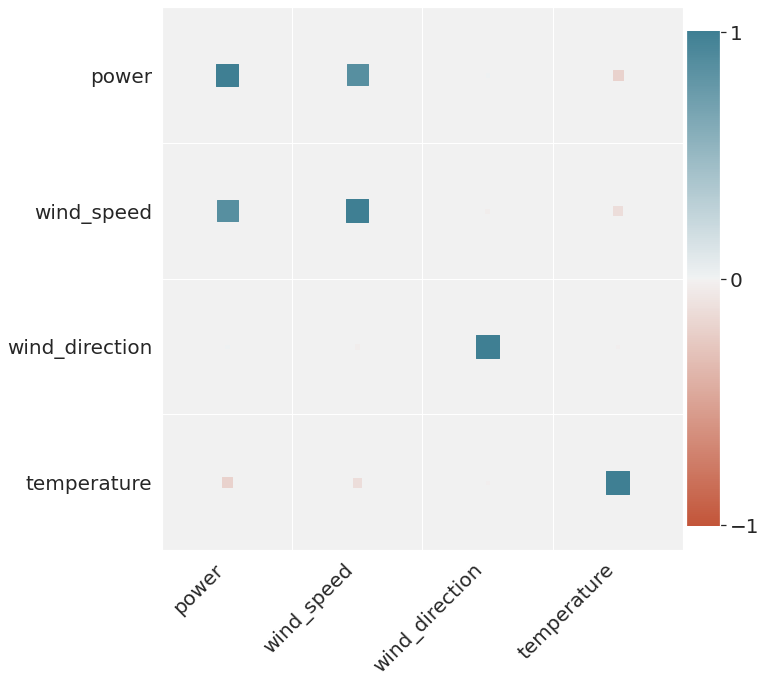

In [ ]:
m = merkel_1[['power','wind_speed','wind_direction','temperature']]
c = m.corr()
plt.figure(figsize=(10, 10))
corrplot(c)

In [ ]:
merkel_1['Month'] = [x.month for x in merkel_1.index]

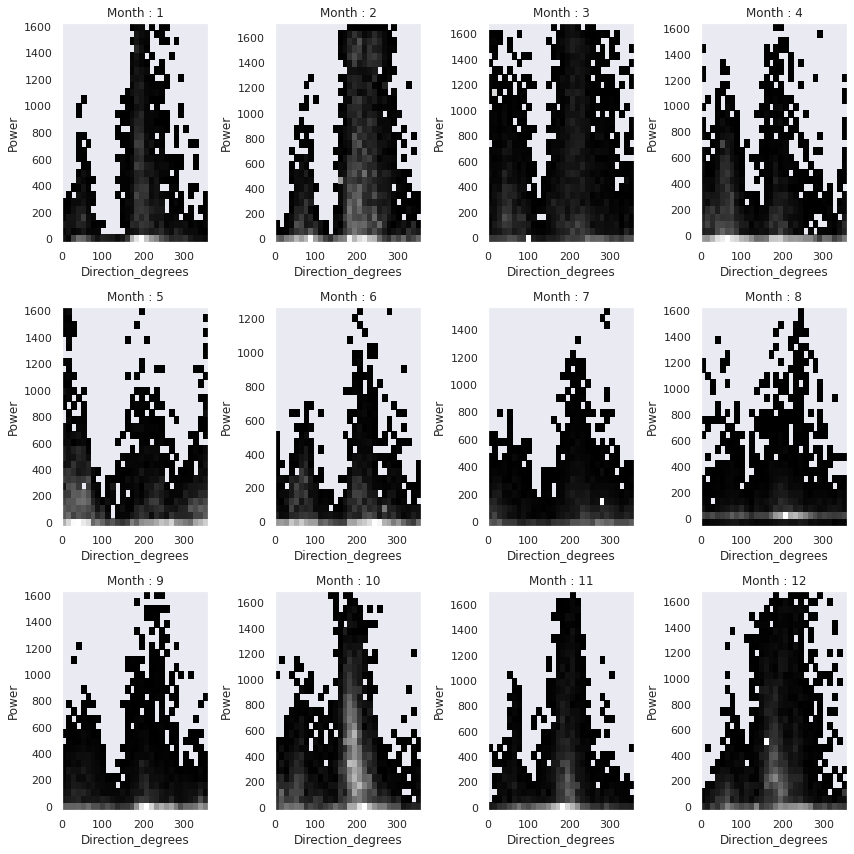

In [ ]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
month_idx = le.fit_transform(merkel_1['Month'])
month = le.classes_

fig, axs = plt.subplots(3,4, figsize=(12, 12))
axs = axs.ravel()


for i, j, p in zip([0,1,2,3,4,5,6,7,8,9,10,11], [0,1,2,3,4,5,6,7,8,9,10,11], month):
    
    axs[j].set_ylabel("Power")
    axs[j].set_xlabel('Direction_degrees')
    
    axs[j].set_title('Month : %s' % p)
    axs[j].hist2d(merkel_1[merkel_1['Month']==p]['wind_direction'],\
                merkel_1[merkel_1['Month']==p]['power'],bins=30,cmap = plt.cm.binary.reversed(),cmax=900,cmin=1)
    
plt.tight_layout(True);

In [ ]:
def w_output(S,d,of):
  offset_angle  = math.radians(d-of)
  val = S*(np.cos(offset_angle))** 2
  return val

def w_sin(d):

  val = np.sin(d)
  return val

def w_cos(d):
  val = np.cos(d)
  return val

In [ ]:
merkel_1['wind_direction_sin'] = merkel_1.apply(lambda row: w_sin(row['wind_direction']), axis=1)
merkel_1['wind_direction_cos'] = merkel_1.apply(lambda row: np.cos(row['wind_direction']), axis=1)
merkel_1['wind_output_50'] = merkel_1.apply(lambda row: w_output(row['wind_speed'], row['wind_direction'], 50), axis=1)
merkel_1['wind_output_200'] = merkel_1.apply(lambda row: w_output(row['wind_speed'], row['wind_direction'], 200), axis=1)

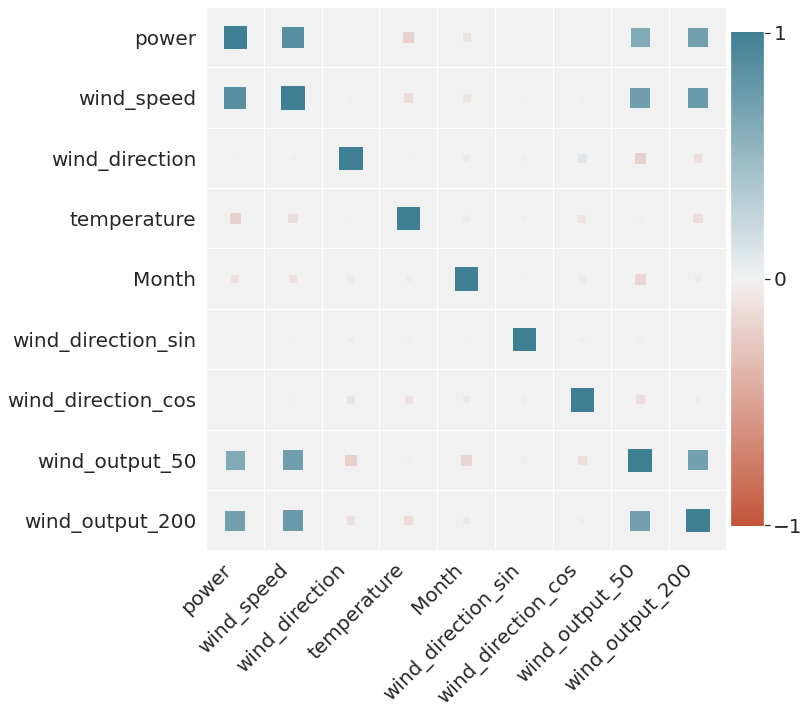

In [ ]:
corr = merkel_1.corr()
plt.figure(figsize=(10, 10))
corrplot(corr)

In [ ]:
NN_df = merkel_1[['wind_speed','wind_output_50',
       'wind_output_200','temperature','power']]

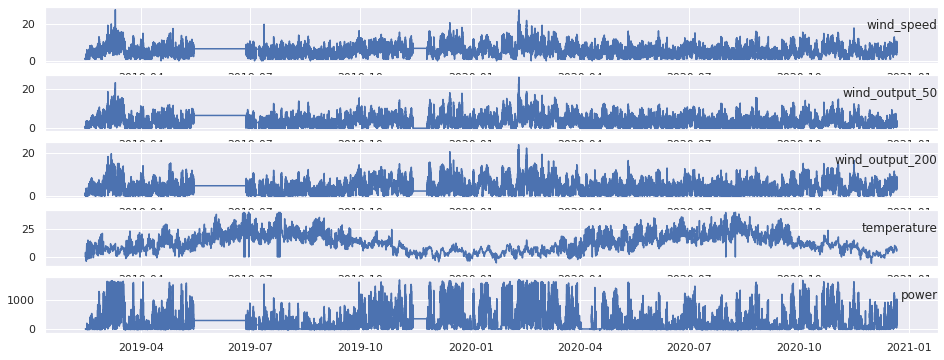

In [ ]:
values = NN_df.values
# specify columns to plot
groups = [0,1,2,3,4]
i = 1
# plot each column
plt.figure(figsize=(16, 6))
for group in groups:
  plt.subplot(len(groups), 1, i)
  plt.plot(NN_df.index,values[:, group])
  plt.title(NN_df.columns[group], y=0.5, loc='right')

  i += 1
plt.show()

In [ ]:
X = NN_df.drop(['power'], axis=1)
y = NN_df['power']
train_size = 0.5
# Split train & test
split_index_test = int(NN_df.shape[0]*train_size) # the index at which to split df into train and test

X_train = X[:split_index_test]
X_test = X[split_index_test:]

y_train = y[:split_index_test]
y_test = y[split_index_test:]

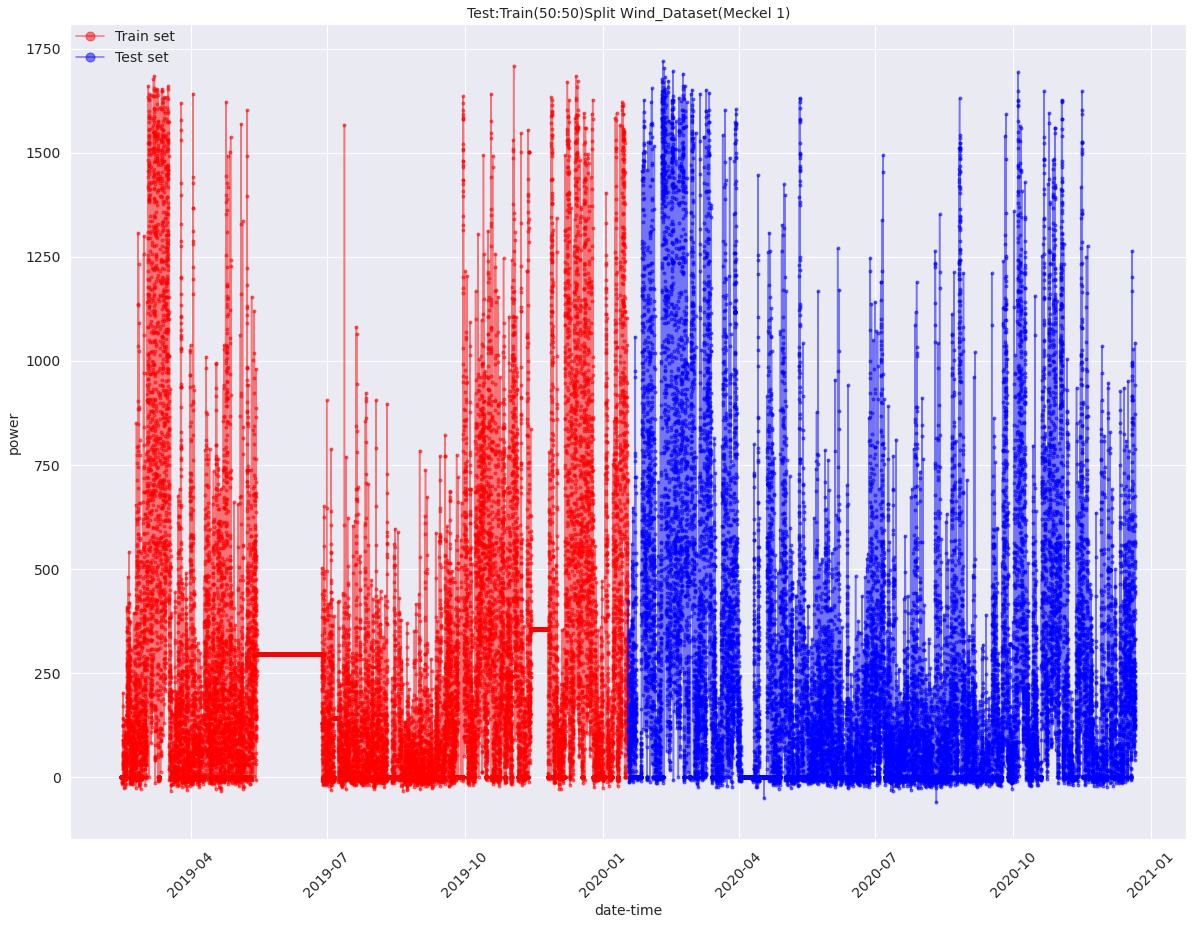

In [ ]:
plt.figure(figsize=(20,15))

plt.plot(X_train.index, y_train, '.-', color='red', label='Train set', alpha=0.5)
plt.plot(X_test.index, y_test, '.-', color='blue', label='Test set', alpha=0.5)

plt.ylabel(r'power', fontsize=14)
plt.xlabel('date-time', fontsize=14) 

plt.title('Test:Train(50:50)Split Wind_Dataset(Meckel 1)', fontsize = 14)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

In [ ]:

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((32620, 4), (32620,))
((32620, 4), (32620,))


In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), kernel_initializer='TruncatedNormal', use_bias=True))
    model.add(LeakyReLU())
    model.add(Dropout(0.083))
    
    # 1
    for _ in range(0):
        model.add(Dense(32, kernel_initializer='TruncatedNormal', use_bias=True))
        model.add(LeakyReLU())
        model.add(Dropout(0.156))   
    
    # 2
    for _ in range(0):
        model.add(Dense(16, kernel_initializer='TruncatedNormal', use_bias=True))
        model.add(LeakyReLU())
        model.add(Dropout(0.899))
    

        
    model.add(Dense(1))
    
    return model

In [ ]:
def mape(y_true, y_pred):
    import keras.backend as K
    """
    Returns the mean absolute percentage error.
    For examples on losses see:
    https://github.com/keras-team/keras/blob/master/keras/losses.py
    """
    return (K.abs(y_true - y_pred) / K.abs(y_pred)) * 100

def smape(y_true, y_pred):
    import keras.backend as K
    """
    Returns the Symmetric mean absolute percentage error.
    For examples on losses see:
    https://github.com/keras-team/keras/blob/master/keras/losses.py
    """
    return (K.abs(y_pred - y_true) / ((K.abs(y_true) + K.abs(y_pred))))*100

def rmse(y_true, y_pred):
  import keras.backend as K
  return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 


In [ ]:

model = create_model()

lr = 1e-2
epochs = 50
bs = 100

# compiling the sequential model
model.compile(loss='mse', optimizer='adam',metrics=[mape, smape, rmse])



In [ ]:
model.fit(X_train, y_train, batch_size=bs, epochs=epochs, verbose=1)

Epoch 1/50
327/327 [==============================] - 1s 2ms/step - loss: 163925.4062 - mape: 83470.2500 - smape: 92.7064 - rmse: 255.8261
Epoch 2/50
327/327 [==============================] - 1s 2ms/step - loss: 144164.2656 - mape: 564.0579 - smape: 72.9261 - rmse: 237.1492
Epoch 3/50
327/327 [==============================] - 1s 2ms/step - loss: 116911.8672 - mape: 191.7690 - smape: 58.4380 - rmse: 214.1144
Epoch 4/50
327/327 [==============================] - 1s 2ms/step - loss: 96310.0000 - mape: 109.3441 - smape: 51.3793 - rmse: 200.9555
Epoch 5/50
327/327 [==============================] - 1s 2ms/step - loss: 86106.6328 - mape: 84.0436 - smape: 48.6830 - rmse: 197.4602
Epoch 6/50
327/327 [==============================] - 1s 2ms/step - loss: 81464.6562 - mape: 75.9424 - smape: 48.0668 - rmse: 198.5880
Epoch 7/50
327/327 [==============================] - 1s 2ms/step - loss: 77786.3281 - mape: 72.6965 - smape: 47.9563 - rmse: 198.4527
Epoch 8/50
327/327 [==========================

In [ ]:
y_pred = model.predict(X_test)

split_index = int(NN_df.shape[0]*train_size)
x = NN_df[split_index:]

datetime_difference = len(x) - len(y_test)
x = x[datetime_difference:]

1020/1020 [==============================] - 2s 1ms/step - loss: 21776.2734 - mape: 67.8000 - smape: 44.0031 - rmse: 89.3975
FINISHED


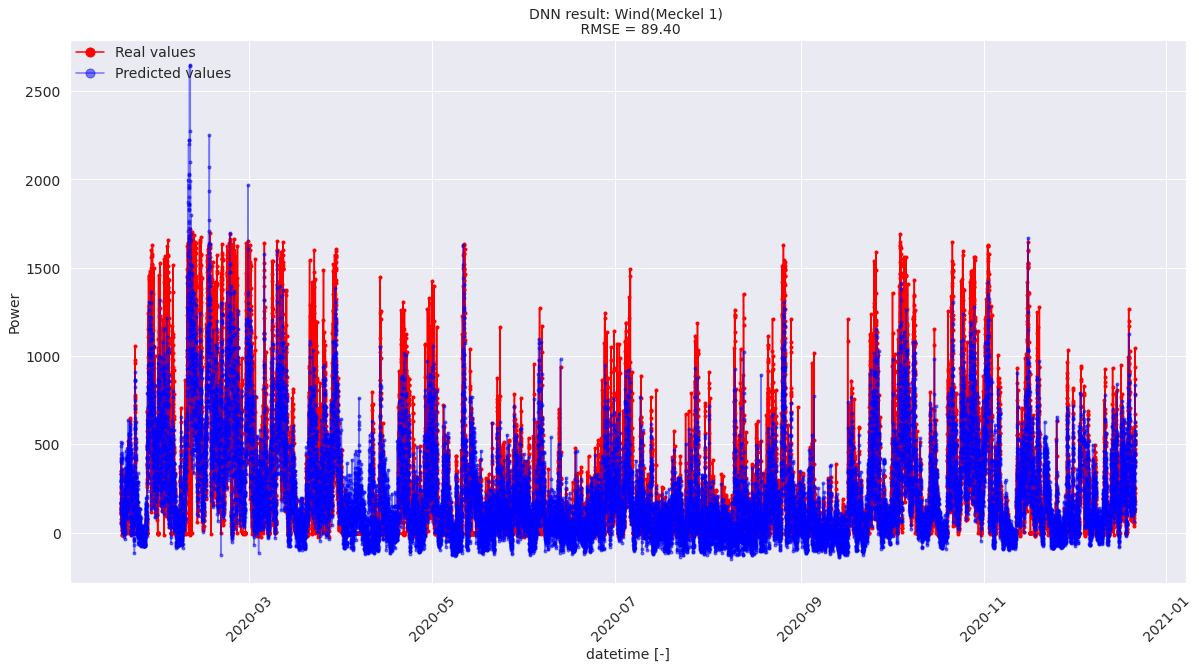

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(x.index, y_test, '.-', color='red', label='Real values', alpha=1)
plt.plot(x.index, y_pred, '.-', color='blue', label='Predicted values', alpha=0.5)

plt.ylabel(r'Power', fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

mse_result = model.evaluate(X_test, y_test)

plt.title('DNN result: Wind(Meckel 1) \n RMSE = %.2f' % (mse_result[3]), fontsize = 14)

#plt.savefig('figures/Feedforward result hourly without dummy variables.png', dpi=1200)
print('FINISHED')

(32620,)


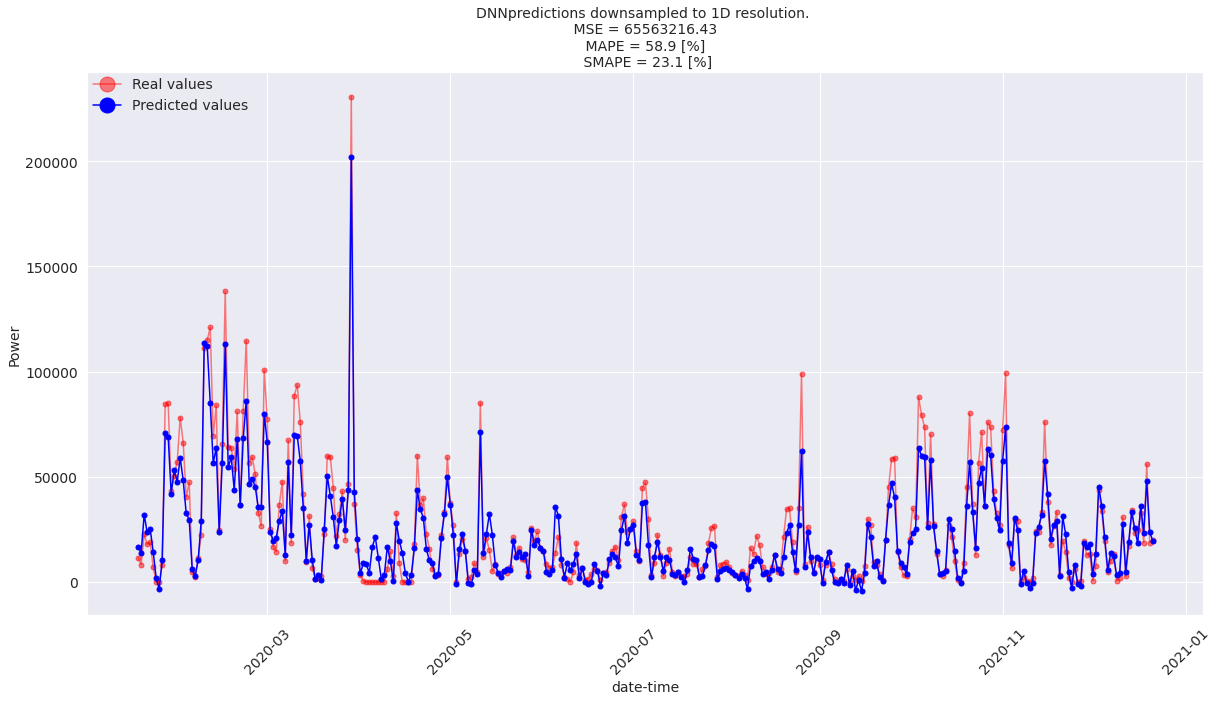

In [ ]:
downsample_results(x, y_pred, y_test.values, resolution='1D', model_name='DNN', savefig=False)

(32620,)


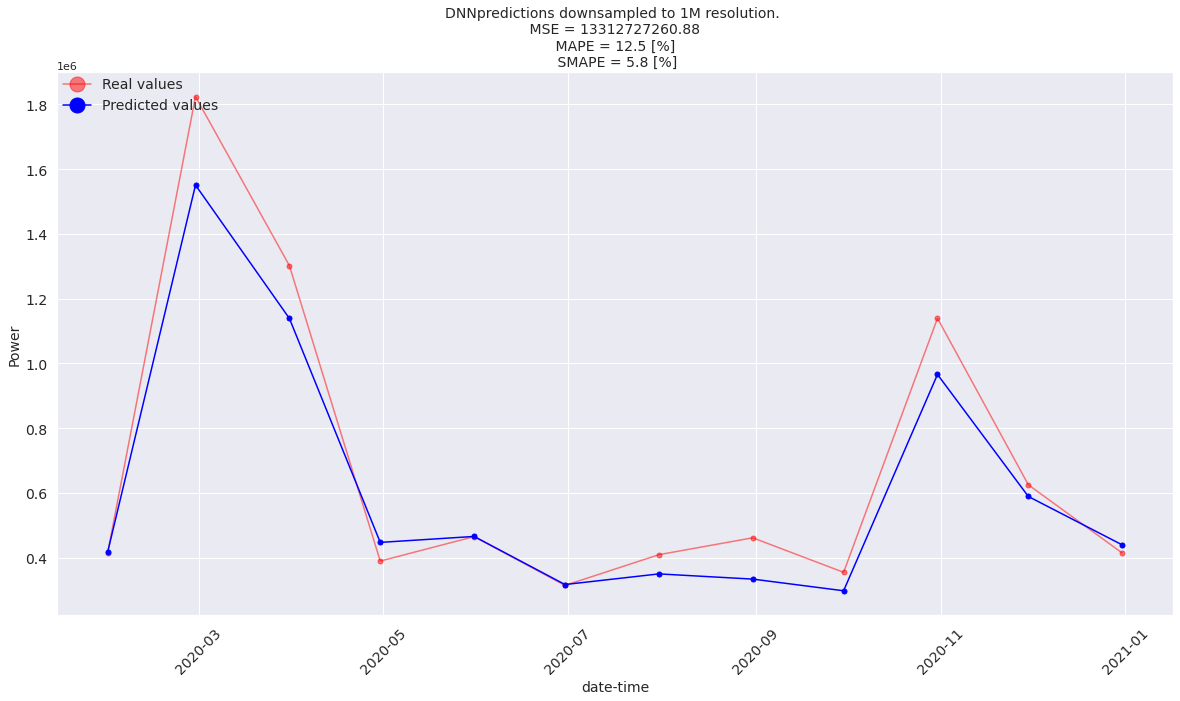

In [ ]:
downsample_results(x, y_pred, y_test.values, resolution='1M', model_name='DNN', savefig=False)

(32620,)


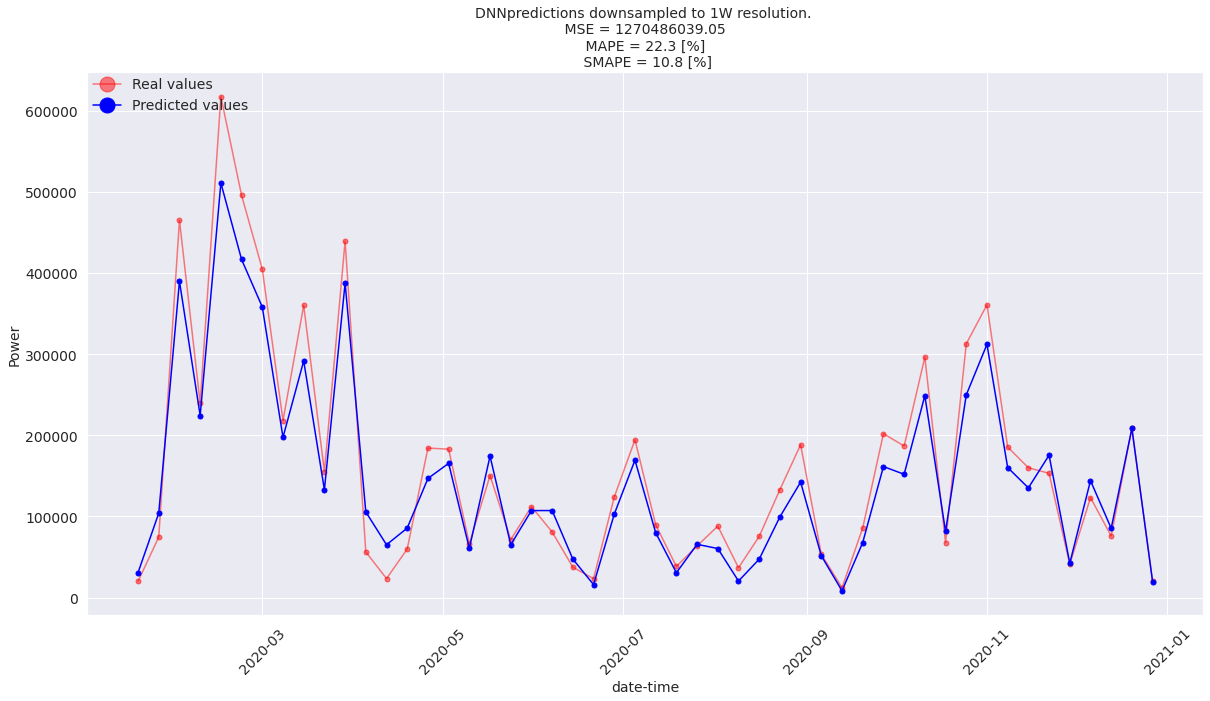

In [ ]:
downsample_results(x, y_pred, y_test.values, resolution='1W', model_name='DNN', savefig=False)

## Get the data in CNN/RNN format
In RNN terms:  
- data format = (samples, timesteps, feautures)  
- or in other words (samples, lookback, feautures)

This translates in CNN terms to:  
- shape = (height, width, channels)

Or in other terms, lets make images of the historical data that is being used to predict the next value of the target column.

## Reshaping the train data
### Visual explanation

Let $A$ be a (5 $\times$ 3) matrix, so 5 rows by 3 columns.  
There are 2 feautures $X$, column 1 is feature $X_1$ and column 2 is the second feature $X_2$.  
Column 3 is the target $y$.  

$A = \begin{bmatrix}
0 & 2 & 0.5 \\ 
1 & 4 & 1.0 \\ 
2 & 6 & 1.5 \\ 
3 & 8 & 2.0 \\ 
4 & 10 & 2.5 
\end{bmatrix}$

Or more precise, in numpy this would be in the form:

$ A = \begin{bmatrix}
\begin{bmatrix} 0 & 2 & 0.5 \end{bmatrix} \\ 
\begin{bmatrix} 1 & 4 & 1.0 \end{bmatrix} \\ 
\begin{bmatrix} 2 & 6 & 1.5 \end{bmatrix} \\ 
\begin{bmatrix} 3 & 8 & 2.0 \end{bmatrix} \\ 
\begin{bmatrix} 4 & 10 & 2.5 \end{bmatrix}
\end{bmatrix}$

This matrix is obtained by `df.values`.  
To prepare this for usage with CNN/RNN it has to be split in $X$ and $y$.  
Where $X$ for RNN is in the shape $(samples, timesteps, features)$ or for CNN in the shape $(height, width, channels)$.  
They practically can be used in the same way for timeseries data, so lets just pick the RNN termonology for now.  
Timesteps can be interpreted as 'lookback', i.e. the amount of timesteps being looked back to predict the $y$ value at said point. 

Next step is to split $A$ into the feature matrix $X$ and the target matrix $y$.

$ X = \begin{bmatrix}
\begin{bmatrix} 0 & 2 \end{bmatrix} \\ 
\begin{bmatrix} 1 & 4 \end{bmatrix} \\ 
\begin{bmatrix} 2 & 6 \end{bmatrix} \\ 
\begin{bmatrix} 3 & 8 \end{bmatrix} \\ 
\begin{bmatrix} 4 & 10 \end{bmatrix}
\end{bmatrix}$ $ \ \ \ \ \ \ \ \ \ \    y = \begin{bmatrix} 0.5 & 1.0 & 1.5 & 2.0 & 2.5 \end{bmatrix}$

Now say that timesteps (or lookback) equals 2.  
The idea is to use the two previous $X$ values to predict the current $y$ value.   

Then $\begin{bmatrix}
\begin{bmatrix} 0 & 2  \end{bmatrix} \\ 
\begin{bmatrix} 1 & 4 \end{bmatrix}
\end{bmatrix}$ will be used to predict $\begin{bmatrix}
\begin{bmatrix} 1.5 \end{bmatrix}
\end{bmatrix}$.  

Note that $\begin{bmatrix}
\begin{bmatrix} 0.5  \end{bmatrix} \\ 
\begin{bmatrix} 1.0 \end{bmatrix}
\end{bmatrix}$ cannot be predicted because the previous two $X$ values for them are not available.

To get this done $X$ has to be reshaped to size $(samples, timesteps, features)$.

$ X = \begin{bmatrix} \begin{bmatrix}
\begin{bmatrix} 0 & 2 \end{bmatrix} \\
\begin{bmatrix} 1 & 4 \end{bmatrix}
\end{bmatrix} \\ 
\begin{bmatrix}
\begin{bmatrix} 1 & 4 \end{bmatrix} \\
\begin{bmatrix} 2 & 6 \end{bmatrix}
\end{bmatrix} \\
\begin{bmatrix}
\begin{bmatrix} 2 & 6 \end{bmatrix} \\
\begin{bmatrix} 3 & 8 \end{bmatrix}
\end{bmatrix} \end{bmatrix}  \ \ \ \ \ $ to predict  $ \ \ \ \ \     y = \begin{bmatrix} 1.5 & 2.0 & 2.5 \end{bmatrix}$

Finally, $X$ and $y$ can be used as input for a CNN/RNN network.


## Pandas DataFrame to CNN & RNN format
following is a general function (with steps explained above) that transforms a dataframe into the required CNN/RNN format.

In [ ]:
def df_to_cnn_rnn_format(df, test_size=0.5, look_back=5, target_column='target', scale_X=True):
    """
    Input is a Pandas DataFrame. 
    Output is a np array in the format of (samples, timesteps, features).
    Currently this function only accepts one target variable.

    Usage example:

    # variables
    df = data # should be a pandas dataframe
    train_size = 0.5 # percentage to use for training
    target_column = 'c' # target column name, all other columns are taken as features
    scale_X = False
    look_back = 5 # Amount of previous X values to look at when predicting the current y value
    """
    df = df.copy()

    # Make sure the target column is the last column in the dataframe
    df['target'] = df[target_column] # Make a copy of the target column, this places the new 'target' column at the end of all the other columns
    df = df.drop(columns=[target_column]) # Drop the original target column
    
    target_location = df.shape[1] - 1 # column index number of target
    split_index = int(df.shape[0]*test_size) # the index at which to split df into train and test
    
    # ...train
    X_train = df.values[:split_index, :target_location]
    y_train = df.values[:split_index, target_location]

    # ...test
    X_test = df.values[split_index:, :target_location] # original is split_index:-1
    y_test = df.values[split_index:, target_location] # original is split_index:-1

    # Scale the features
    if scale_X:
        scalerX = MinMaxScaler()
        X_train = scalerX.fit_transform(X_train)
        X_test = scalerX.fit_transform(X_test)
        
    # Reshape the arrays
    samples = len(X_train)
    num_features = target_location # All columns before the target column are features

    samples_train = X_train.shape[0] - look_back
    X_train_reshaped = np.zeros((samples_train, look_back, num_features)) # Initialize the required shape with an 'empty' zeros array.
    y_train_reshaped = np.zeros((samples_train))

    for i in range(samples_train):
        y_position = i + look_back
        X_train_reshaped[i] = X_train[i:y_position]
        y_train_reshaped[i] = y_train[y_position]


    samples_test = X_test.shape[0] - look_back
    X_test_reshaped = np.zeros((samples_test, look_back, num_features))
    y_test_reshaped = np.zeros((samples_test))

    for i in range(samples_test):
        y_position = i + look_back
        X_test_reshaped[i] = X_test[i:y_position]
        y_test_reshaped[i] = y_test[y_position]
    
    return X_train_reshaped, y_train_reshaped, X_test_reshaped, y_test_reshaped

In [ ]:
look_back = 4*4 # D -> 5, H -> 5*24
num_features = NN_df.shape[1] - 1
output_dim = 1
train_size = 0.5

X_train, y_train, X_test, y_test = df_to_cnn_rnn_format(df=NN_df, test_size=train_size, look_back=look_back, target_column='power', scale_X=True)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_train.shape

(32604, 16, 4, 1)

In [ ]:
def create_model_cnn(X_train, y_train, X_test, y_test):
    
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

    model = Sequential()
    
    ks1_first = 3
    ks1_second = 8
    
    ks2_first = 4
    ks2_second = 5
    
    model.add(Conv2D(filters=(3), 
                     kernel_size=(ks1_first, ks1_second),
                     input_shape=input_shape, 
                     padding='same',
                     kernel_initializer='TruncatedNormal'))
    model.add(LeakyReLU())
    model.add(Dropout(0.025))
    
    for _ in range(2):
        model.add(Conv2D(filters=(4), 
                     kernel_size= (ks2_first, ks2_second), 
                         padding='same',
                     kernel_initializer='TruncatedNormal'))
        model.add(LeakyReLU())
        model.add(Dropout(0.280))  
    
    model.add(Flatten())
    
    for _ in range(2):
        model.add(Dense(64 , kernel_initializer='TruncatedNormal'))
        model.add(LeakyReLU())
        model.add(Dropout(0.435))
  
  
    model.add(Dense(1024 , kernel_initializer='TruncatedNormal'))
    model.add(LeakyReLU())
    model.add(Dropout(0.793))
        
    model.add(Dense(1))
    
    return model

In [ ]:
model_cnn = create_model_cnn(X_train, y_train, X_test, y_test)
# compiling the sequential model
model_cnn.compile(loss='mse', optimizer='adam',metrics=[mape, smape, rmse])

In [ ]:
epochs = 10
bs = 20

model_cnn.fit(X_train, y_train, batch_size=bs, epochs=epochs,validation_split=0.2,verbose=1)

Epoch 1/10
1305/1305 [==============================] - 17s 13ms/step - loss: 46502.6445 - mape: 125861.3594 - smape: 48.2303 - rmse: 129.9329 - val_loss: 62489.8711 - val_mape: 59.5382 - val_smape: 35.7720 - val_rmse: 170.2652
Epoch 2/10
1305/1305 [==============================] - 16s 12ms/step - loss: 34820.6055 - mape: 120.4463 - smape: 45.0591 - rmse: 113.1330 - val_loss: 46382.0234 - val_mape: 43.6524 - val_smape: 31.0089 - val_rmse: 133.3001
Epoch 3/10
1305/1305 [==============================] - 16s 13ms/step - loss: 33485.2539 - mape: 86.3782 - smape: 44.4567 - rmse: 109.3257 - val_loss: 54359.8633 - val_mape: 46.2566 - val_smape: 34.9078 - val_rmse: 167.6366
Epoch 4/10
1305/1305 [==============================] - 16s 12ms/step - loss: 31799.4336 - mape: 78.1218 - smape: 43.9006 - rmse: 105.7439 - val_loss: 47840.3047 - val_mape: 47.5408 - val_smape: 30.9903 - val_rmse: 135.9975
Epoch 5/10
1305/1305 [==============================] - 16s 12ms/step - loss: 31633.0977 - mape: 88

In [ ]:
print(model_cnn.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 4, 3)          75        
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 16, 4, 3)          0         
                                                                 
 dropout_13 (Dropout)        (None, 16, 4, 3)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 4, 4)          244       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 16, 4, 4)          0         
                                                                 
 dropout_14 (Dropout)        (None, 16, 4, 4)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 4, 4)         

In [ ]:
y_pred = model_cnn.predict(X_test)
y_true = y_test.reshape(y_test.shape[0], 1)

split_index = int(NN_df.shape[0]*train_size)
x = NN_df[split_index:]

datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:] # Correct for datetime difference, this is a dirty way of doing it

1019/1019 [==============================] - 5s 5ms/step - loss: 36209.6289 - mape: 94.2637 - smape: 49.1622 - rmse: 106.6332
FINISHED


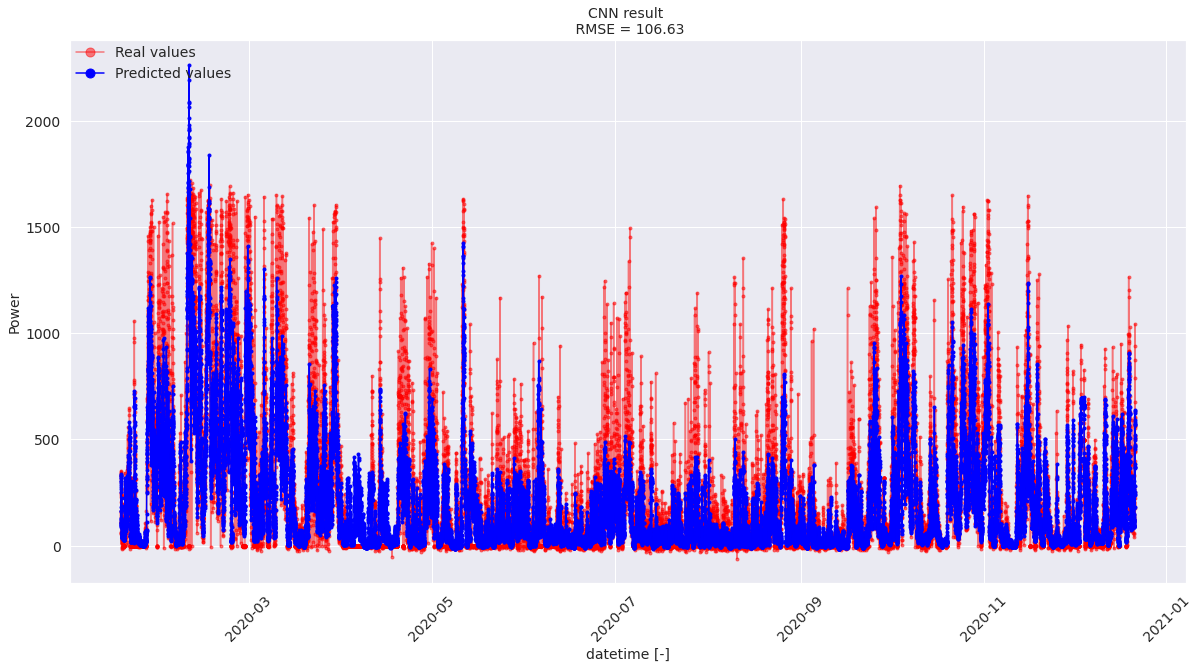

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(x.index, y_true, '.-', color='red', label='Real values', alpha=0.5)
plt.plot(x.index, y_pred, '.-', color='blue', label='Predicted values', alpha=1)

plt.ylabel(r'Power', fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

mse_result = model_cnn.evaluate(X_test, y_test)

plt.title('CNN result \n RMSE = %.2f' % (mse_result[3]), fontsize = 14)

#plt.savefig('figures/Feedforward result hourly without dummy variables.png', dpi=1200)
print('FINISHED')

In [ ]:
def create_model_lstm():
    model = Sequential()
    model.add(LSTM(4, input_shape=(look_back, num_features), return_sequences=True, kernel_initializer='TruncatedNormal'))
 
    model.add(LeakyReLU())
    model.add(Dropout(0.391))
    
    #1
    for _ in range(2):
        model.add(LSTM(4, kernel_initializer='TruncatedNormal', return_sequences=True))

        model.add(LeakyReLU())
        model.add(Dropout(0.04))   

    #2
    model.add(LSTM(32, kernel_initializer='TruncatedNormal', return_sequences=False))
    model.add(LeakyReLU())
    model.add(Dropout(0.749))
    
    #3
    for _ in range(0):
        model.add(Dense(4, kernel_initializer='TruncatedNormal'))
        model.add(LeakyReLU())
        model.add(Dropout(0.056))
    #3
    for _ in range(1):
        model.add(Dense(256, kernel_initializer='TruncatedNormal'))
        model.add(LeakyReLU())
        model.add(Dropout(0.212))
    #4
    for _ in range(1):
        model.add(Dense(64, kernel_initializer='TruncatedNormal'))
        model.add(LeakyReLU())
        model.add(Dropout(0.727))

    #5
    model.add(Dense(32, kernel_initializer='TruncatedNormal'))
    model.add(LeakyReLU())
    model.add(Dropout(0.450))
        
    model.add(Dense(1))
    
    return model

In [ ]:
model_lstm = create_model_lstm()
# compiling the sequential model
model_lstm.compile(loss='mse', optimizer='adam',metrics=[mape, smape, rmse])

In [ ]:
epochs = 10
bs = 20

model_lstm.fit(X_train, y_train, batch_size=bs, epochs=epochs,validation_split=0.2,verbose=1)

Epoch 1/10
1305/1305 [==============================] - 49s 30ms/step - loss: 67462.0625 - mape: 580093888.0000 - smape: 53.2414 - rmse: 168.0825 - val_loss: 90459.0312 - val_mape: 77.8222 - val_smape: 39.6708 - val_rmse: 207.8615
Epoch 2/10
1305/1305 [==============================] - 37s 28ms/step - loss: 51102.8438 - mape: 150.8479 - smape: 49.4539 - rmse: 144.8281 - val_loss: 62347.0469 - val_mape: 54.7071 - val_smape: 34.7722 - val_rmse: 168.2393
Epoch 3/10
1305/1305 [==============================] - 37s 29ms/step - loss: 47047.7031 - mape: 113.3326 - smape: 48.3070 - rmse: 136.7288 - val_loss: 79174.2812 - val_mape: 65.2267 - val_smape: 35.8299 - val_rmse: 182.1354
Epoch 4/10
1305/1305 [==============================] - 37s 29ms/step - loss: 44688.0664 - mape: 100.6383 - smape: 47.5700 - rmse: 132.2194 - val_loss: 68293.0703 - val_mape: 59.1546 - val_smape: 33.6746 - val_rmse: 163.3784
Epoch 5/10
1305/1305 [==============================] - 37s 29ms/step - loss: 43856.3594 - map

In [ ]:
print(model_lstm.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 16, 4)             144       
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 16, 4)             0         
                                                                 
 dropout_23 (Dropout)        (None, 16, 4)             0         
                                                                 
 lstm_5 (LSTM)               (None, 16, 4)             144       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 16, 4)             0         
                                                                 
 dropout_24 (Dropout)        (None, 16, 4)             0         
                                                                 
 lstm_6 (LSTM)               (None, 16, 4)            

In [ ]:
y_pred = model_lstm.predict(X_test)
y_true = y_test.reshape(y_test.shape[0], 1)

split_index = int(NN_df.shape[0]*train_size)
x = NN_df[split_index:]

datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:] # Correct for datetime difference, this is a dirty way of doing it

1019/1019 [==============================] - 10s 10ms/step - loss: 36303.2969 - mape: 80.1469 - smape: 49.2852 - rmse: 115.1078
FINISHED


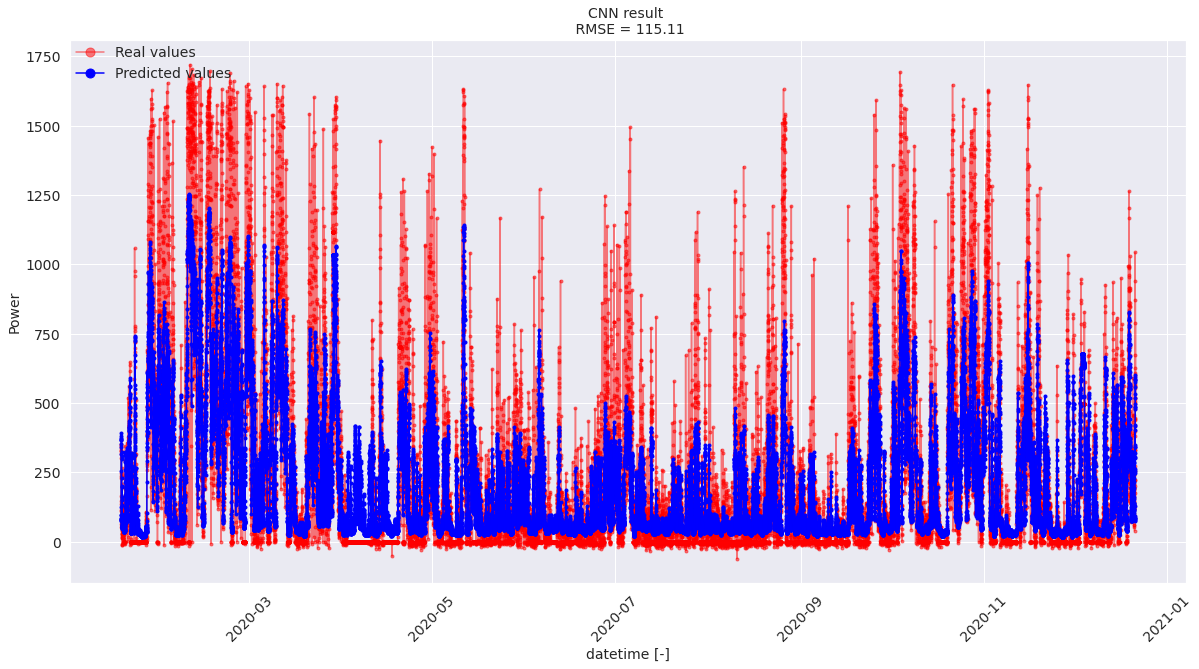

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(x.index, y_true, '.-', color='red', label='Real values', alpha=0.5)
plt.plot(x.index, y_pred, '.-', color='blue', label='Predicted values', alpha=1)

plt.ylabel(r'Power', fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

mse_result = model_lstm.evaluate(X_test, y_test)

plt.title('CNN result \n RMSE = %.2f' % (mse_result[3]), fontsize = 14)

#plt.savefig('figures/Feedforward result hourly without dummy variables.png', dpi=1200)
print('FINISHED')